In [1]:
#Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Datatype
#reading melb_house database 
melbdata = pd.read_csv("H:\\Downloads\\melb_house.csv", header=0, delimiter=",")
melbdata.head()



,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


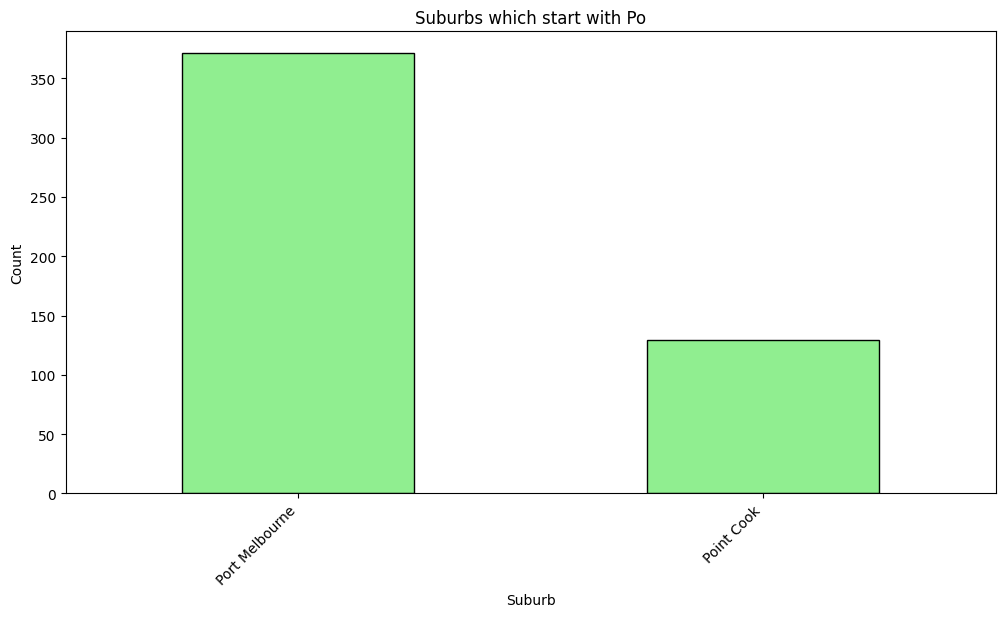

In [3]:
#Strcontains and Value counts
strcontain_melbdata = melbdata[melbdata['suburb'].str.contains('^Po', case=False)]
#Count the occurrences of each suburb
po_counts = strcontain_melbdata['suburb'].value_counts()

#The bar chart
plt.figure(figsize=(12, 6))
po_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Suburbs which start with Po')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

                     price
suburb                    
Abbotsford      1033549.02
Aberfeldie      1307192.86
Airport West     751364.25
Albanvale        536055.56
Albert Park     1927650.54
Albion           615123.73
Alphington      1397532.26
Altona           884155.50
Altona Meadows   653557.69
Altona North     789713.29


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19656\1979699296.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=first_10_suburbs.reset_index(), x='suburb', y='price', errorbar=None, palette='bright')


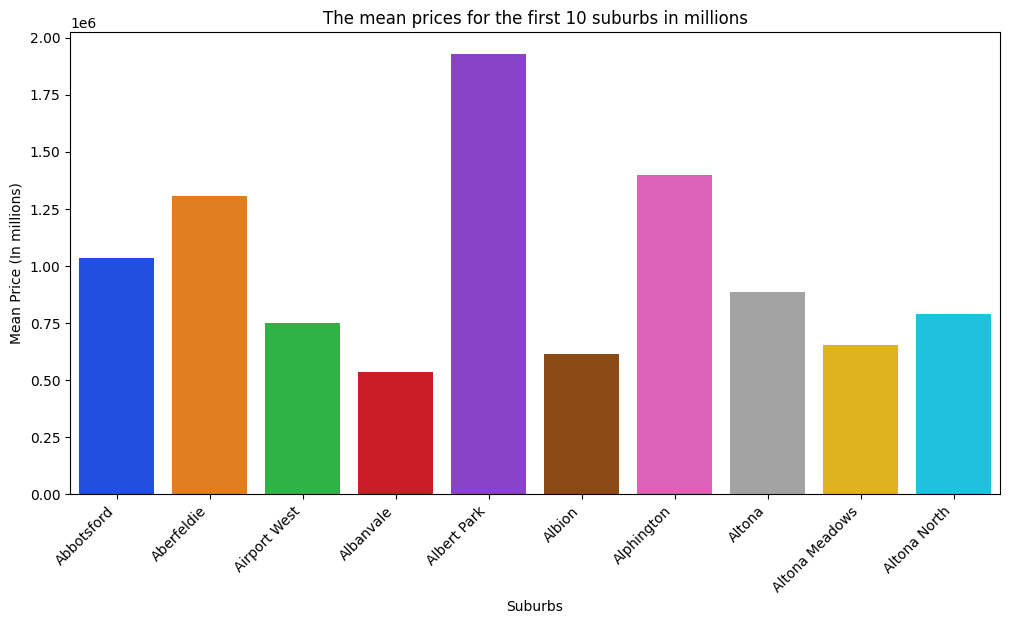

In [4]:
#Pivot tables
#Pivot table code for mean price in each suburb
pivottableprice = melbdata.pivot_table(values='price', index='suburb', aggfunc='mean')

#Making result to two decimal places
pivottableprice = pivottableprice.round(2)

#Asking for only first 10 suburbs
first_10_suburbs = pivottableprice.head(10)
print(first_10_suburbs)

#Resetting the index
pivottablereset = pivottableprice.reset_index()

#Code for bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=first_10_suburbs.reset_index(), x='suburb', y='price', errorbar=None, palette='bright')
plt.title('The mean prices for the first 10 suburbs in millions')
plt.xlabel('Suburbs')
plt.ylabel('Mean Price (In millions)')
plt.xticks(rotation=45, ha='right')
plt.show()



In [5]:
#Subsetting
price_year_subset = melbdata[['suburb', 'year_built']]

#Print
print("Subset DataFrame for 'price' and 'date': ", price_year_subset)

Subset DataFrame for 'price' and 'date':             suburb  year_built
0      Abbotsford         NaN
1      Abbotsford         NaN
2      Abbotsford      1900.0
3      Abbotsford         NaN
4      Abbotsford      1900.0
...           ...         ...
34852  Yarraville         NaN
34853  Yarraville      2018.0
34854  Yarraville      2000.0
34855  Yarraville         NaN
34856  Yarraville      1930.0

[34857 rows x 2 columns]


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19656\2458688173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suburb_car_subset['car'] = suburb_car_subset['car'].map({0.0: 'No Car', 1.0: '1 Car'})


<Figure size 1200x600 with 0 Axes>

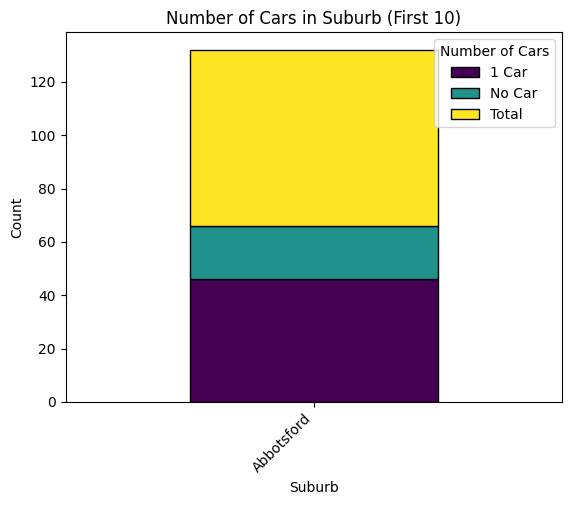

In [6]:
#Isin and Contingency table
#Using Subsetting for 'suburb' and 'car'
suburb_car_subset = melbdata[['suburb', 'car']]

#Using mapping and count occurrences for each suburb
suburb_car_subset['car'] = suburb_car_subset['car'].map({0.0: 'No Car', 1.0: '1 Car'})

#Filter for the first 10 suburbs
first_10_suburbs_car_counts = suburb_car_subset[suburb_car_subset['suburb'].isin(suburb_car_subset['suburb'].head(10))]

#Count total occurrences of each car value for each suburb
car_counts = first_10_suburbs_car_counts.groupby(['suburb', 'car']).size().unstack(fill_value=0)

#Sum the counts across rows to get the total for each suburb
car_counts['Total'] = car_counts.sum(axis=1)

#Plotting for the first 10 suburbs
plt.figure(figsize=(12, 6))
car_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Number of Cars in Suburb (First 10)')
plt.xlabel('Suburb')
plt.ylabel('Count')
plt.legend(title='Number of Cars', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()


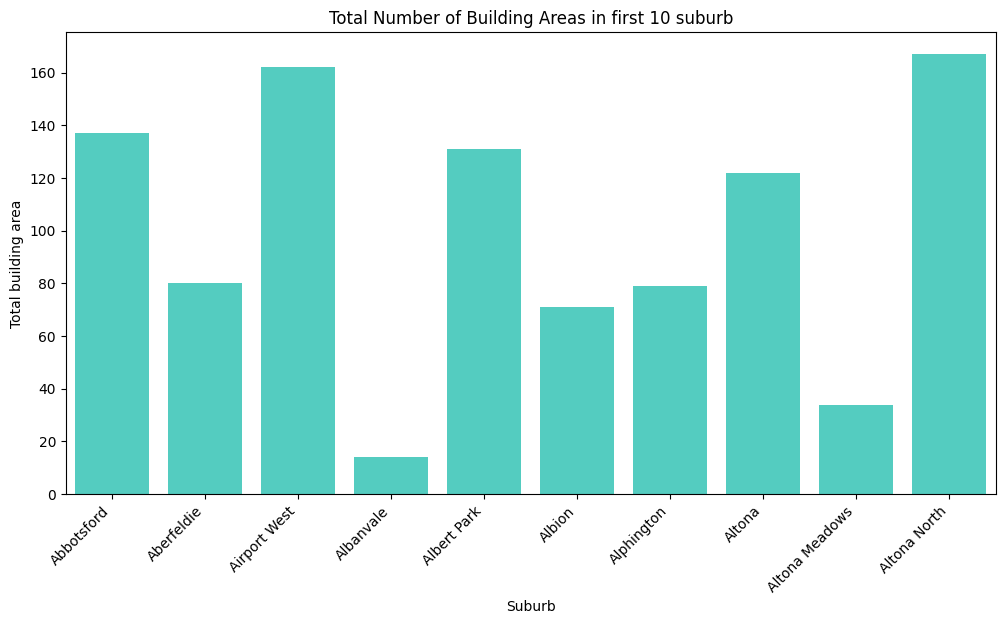

In [7]:
#Groupby and Drop NaN
#Make all NaN values of building_area column to 0
melbdata['building_area'].fillna(0, inplace=True)

#Group by suburb and count the total number of building areas in first 10 suburb
building_area_counts = melbdata.groupby('suburb')['building_area'].count().head(10)

#The graph
plt.figure(figsize=(12, 6))
sns.barplot(x=building_area_counts.index, y=building_area_counts.values, color='turquoise')
plt.title('Total Number of Building Areas in first 10 suburb')
plt.xlabel('Suburb')
plt.ylabel('Total building area')
plt.xticks(rotation=45, ha='right')
plt.show()


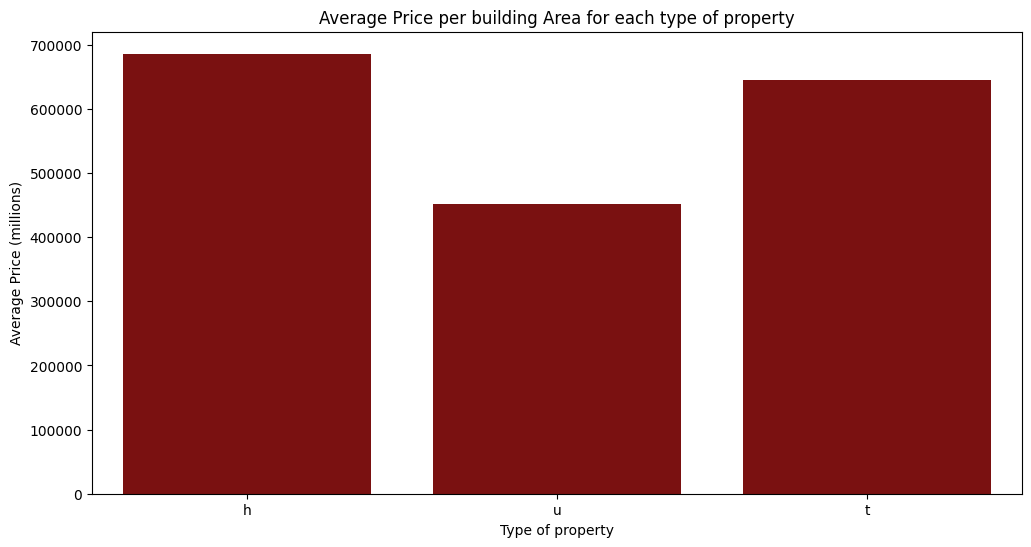

In [8]:
#Lambda function
melbdatalambda = melbdata.assign(priceperbuildingarea=lambda x: x['price'] / (x['building_area'] + 1))

#Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='priceperbuildingarea', data=melbdatalambda, estimator=lambda x: x.mean(), errorbar=None, color="darkred")
plt.title('Average Price per building Area for each type of property')
plt.xlabel('Type of property')
plt.ylabel('Average Price (millions)')
plt.show()


In [9]:
melbdata.columns
print(melbdata["region_name"])

0        Northern Metropolitan
1        Northern Metropolitan
2        Northern Metropolitan
3        Northern Metropolitan
4        Northern Metropolitan
                 ...          
34852     Western Metropolitan
34853     Western Metropolitan
34854     Western Metropolitan
34855     Western Metropolitan
34856     Western Metropolitan
Name: region_name, Length: 34857, dtype: object


                 region_name  bedroom2 variable      value
0      Northern Metropolitan       2.0    price        NaN
1      Northern Metropolitan       2.0    price  1480000.0
2      Northern Metropolitan       2.0    price  1035000.0
3      Northern Metropolitan       3.0    price        NaN
4      Northern Metropolitan       3.0    price  1465000.0
...                      ...       ...      ...        ...
34852   Western Metropolitan       4.0    price  1480000.0
34853   Western Metropolitan       2.0    price   888000.0
34854   Western Metropolitan       2.0    price   705000.0
34855   Western Metropolitan       NaN    price  1140000.0
34856   Western Metropolitan       2.0    price  1020000.0

[34857 rows x 4 columns]


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19656\1475686652.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x='region_name', y='value', hue='bedroom2', data=meltmelb, errorbar=None,color="red")


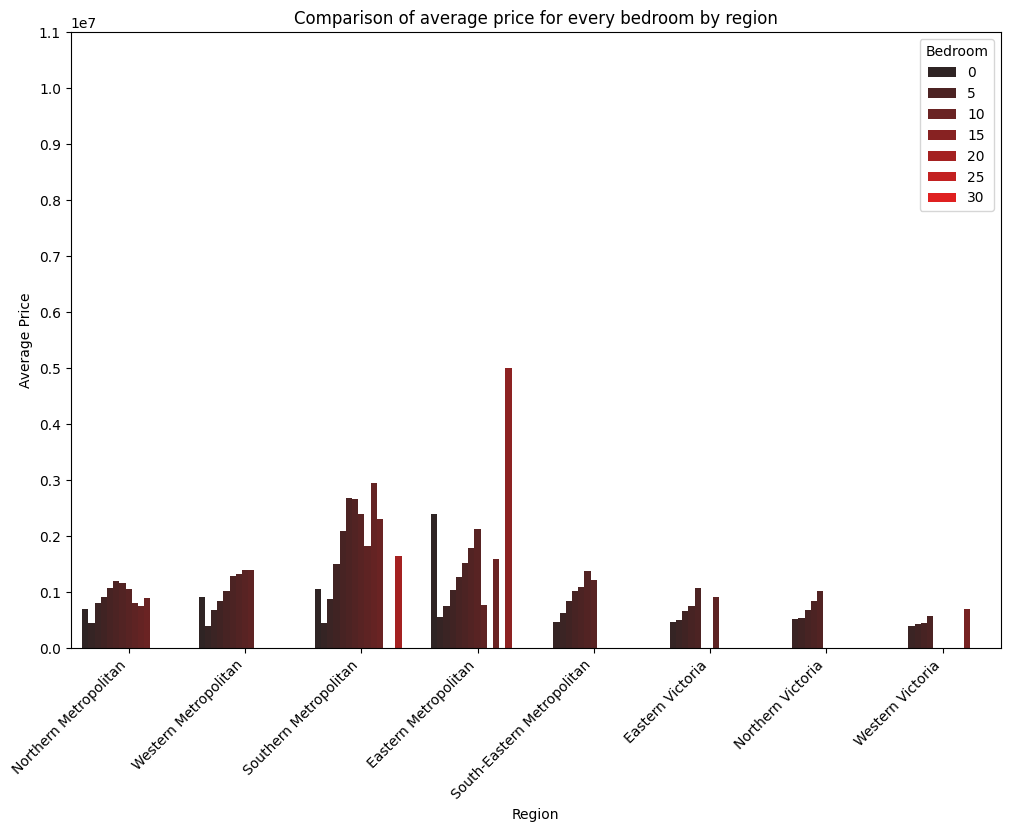

In [10]:
#Melt
#First subsetting
subsetmelb = melbdata[['region_name', 'price', 'bedroom2']]

#Melt function
meltmelb = pd.melt(subsetmelb, id_vars=['region_name', 'bedroom2'], var_name='variable', value_name='value')

print(meltmelb)

#Graph
plt.figure(figsize=(12, 8))
sns.barplot(x='region_name', y='value', hue='bedroom2', data=meltmelb, errorbar=None,color="red")
plt.title('Comparison of average price for every bedroom by region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bedroom')

#Changing step for y-axis
plt.yticks(range(0, int(meltmelb['value'].max()) + 1, 1000000))  #reminder to self that can change step of graph here

plt.show()


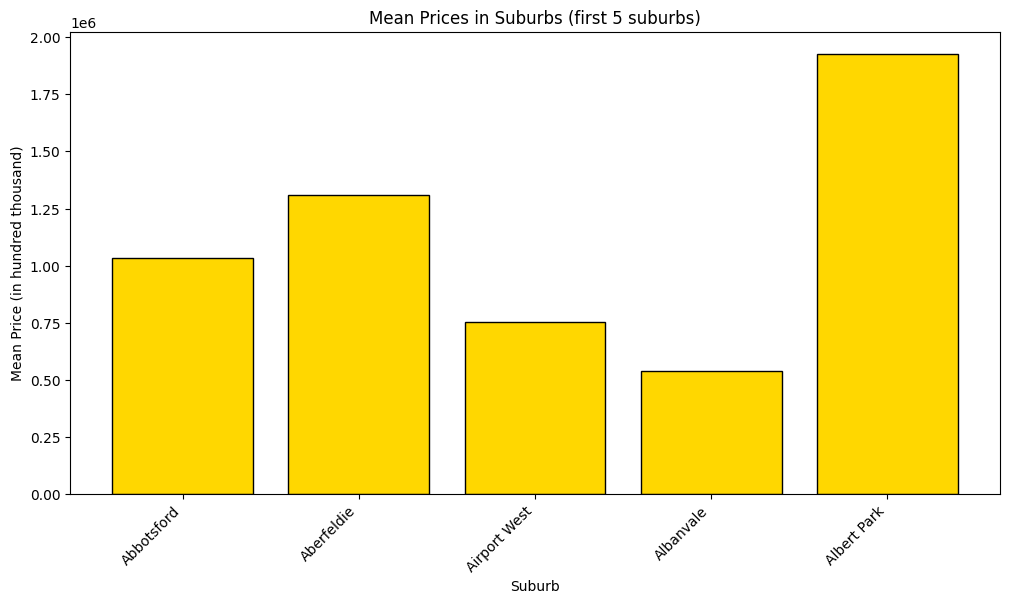

In [11]:
#iloc
#Mean price for each suburb
mean_prices_by_suburb = melbdata.groupby('suburb')['price'].mean().reset_index()

#Using iloc
subset_data = mean_prices_by_suburb.iloc[0:5, [0, 1]]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(subset_data.iloc[:, 0], subset_data.iloc[:, 1], color='gold', edgecolor='black')
plt.title('Mean Prices in Suburbs (first 5 suburbs)')
plt.xlabel('Suburb')
plt.ylabel('Mean Price (in hundred thousand)')
plt.xticks(rotation=45, ha='right')
plt.show()

Merged DataFrame:
          suburb  rooms type      price method         seller_g        date  \
0     Abbotsford      2    h        NaN     SS           Jellis  2016-09-03   
1     Abbotsford      2    h  1480000.0      S           Biggin  2016-12-03   
2     Abbotsford      2    h  1035000.0      S           Biggin  2016-02-04   
3     Abbotsford      3    u        NaN     VB           Rounds  2016-02-04   
4     Abbotsford      3    h  1465000.0     SP           Biggin  2017-03-04   
...          ...    ...  ...        ...    ...              ...         ...   
1572     Ashwood      3    h  1554000.0      S    hockingstuart  2018-02-24   
1573     Ashwood      4    h  1850000.0      S           Buxton  2018-02-24   
1574     Ashwood      5    h  1975000.0      S  Buxton/Marshall  2018-02-24   
1575     Ashwood      4    h        NaN     VB           Buxton  2018-02-24   
1576     Ashwood      4    h  1185500.0      S           Buxton  2018-02-24   

      distance  postcode  bedroom

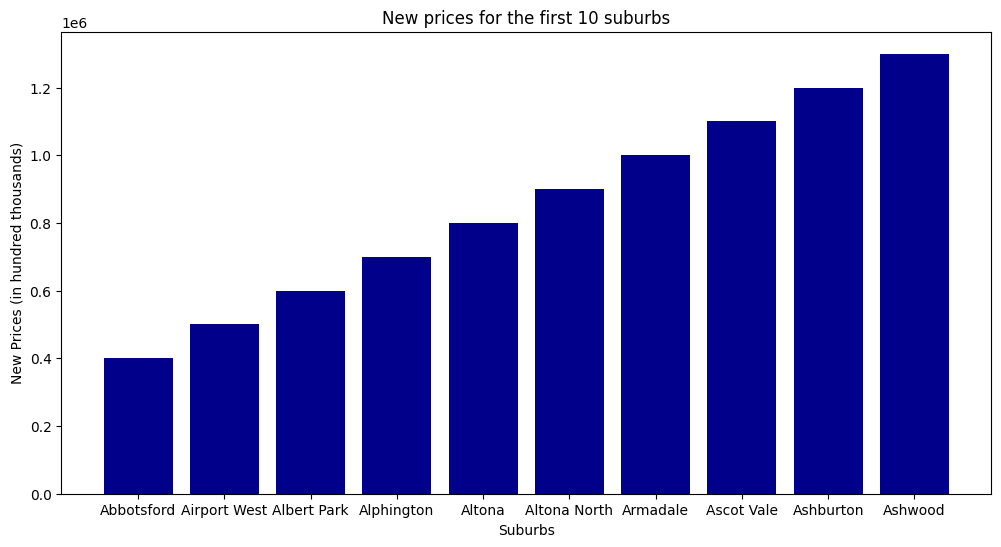

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the melbdata DataFrame
# melbdata = pd.read_csv("H:\\Downloads\\melb_house.csv", header=0, delimiter=",")

#Just a random second DataFrame with new unique prices for the first 10 suburbs
first_10_suburbs = melbdata['suburb'].unique()[:10]
data2 = {'suburb': first_10_suburbs,
         'new_prices': [400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000]}
df2 = pd.DataFrame(data2)

#Merge melbdata with my df2
merged_melbdata = pd.merge(melbdata, df2, on='suburb', how='inner')
print("Merged DataFrame:")
print(merged_melbdata)

#plot for graph
plt.figure(figsize=(12, 6))
plt.bar(merged_melbdata['suburb'], merged_melbdata['new_prices'], color='darkblue', alpha=0.5)
plt.title('New prices for the first 10 suburbs')
plt.xlabel('Suburbs')
plt.ylabel('New Prices (in hundred thousands)')
plt.show()
